In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical


In [16]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
print(X)
print(y)

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]
 [ 1.08583443  0.83913611]
 [ 1.38965297 -0.93588251]
 [-1.58604649 -0.85462178]
 [-0.44909701  0.94272961]
 [ 1.40572155 -1.68359671]
 [-0.71461074 -0.0609578 ]
 [ 0.63020037  0.13222531]
 [ 0.74338976  0.0234151 ]
 [ 1.02112227  0.35169921]
 [-1.40786203  1.06717692]
 [ 0.73537974  0.62811535]
 [-0.53991778  0.49305918]
 [ 1.16554523  1.01893675]
 [-0.19294613  0.43191854]
 [-1.16056577 -0.73060349]
 [ 0.67184979  0.7509346 ]
 [-0.25482897 -0.6659765 ]
 [-0.8742912   0.46949382]
 [ 0.57943063  0.35688003]
 [ 1.16644953 -1.05312047]
 [ 0.82413112  1.43528819]
 [-1.15029996 -1.55188999]
 [-1.50155227  0.7448994 ]
 [ 0.27281391  0.11862263]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [-0.48077467 -0.18831422]
 

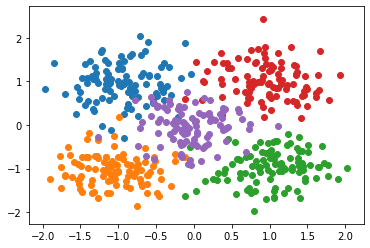

In [17]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [18]:
print(y)
y_cat = to_categorical(y,5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [19]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(x=X, y=y_cat, verbose=0, batch_size=50, epochs=100)

In [21]:
def plot_boundry(X, y_cat, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25, 50)
    y_span = np.linspace(min(X[:, 1])-0.25, max(X[:, 1])+0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    predict_func = model.predict_classes(grid)
    z = predict_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

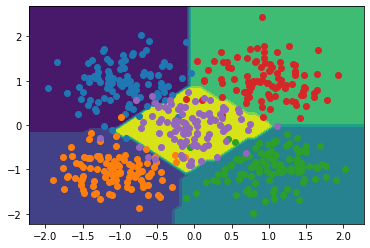

In [22]:
plot_boundry(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1],)
plt.scatter(X[y==1,0],X[y==1,1],)
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

Prediction is:  [3]


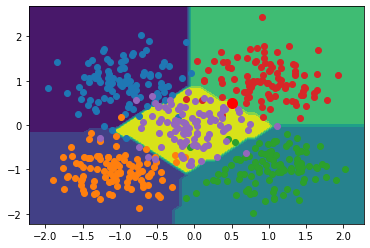

In [23]:
plot_boundry(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x = 0.5
y = 0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print('Prediction is: ', prediction)